## Package imports & settings

In [1]:
import os
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from fastai.tabular.all import *


pd.set_option("display.width", 140)

----
## Reading in the data

In [2]:
data_path = "../data/processed/transformed/Retail data.csv"

df = pd.read_csv(data_path, sep=";")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23983 entries, 0 to 23982
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MORTGAGE                23983 non-null  float64
 1   AGE                     23983 non-null  float64
 2   YEARS_WITH_BANK         23983 non-null  float64
 3   INCOME                  23983 non-null  float64
 4   BALANCE                 23983 non-null  float64
 5   ADDRESS_MISSING         23983 non-null  float64
 6   YEARS_WITH_ADDRESS      23983 non-null  float64
 7   JOB_MISSING             23983 non-null  float64
 8   YEARS_WITH_JOB          23983 non-null  float64
 9   MARITAL_STATUS_MISSING  23983 non-null  float64
 10  MARITAL_STATUS_D        23983 non-null  float64
 11  MARITAL_STATUS_M        23983 non-null  float64
 12  MARITAL_STATUS_S        23983 non-null  float64
 13  MARITAL_STATUS_W        23983 non-null  float64
 14  EDUCATION_BCR           23983 non-null

----
## Splitting the dataset

In [4]:
target_column = "MORTGAGE"

continuous_columns = [
    "AGE",
    "YEARS_WITH_BANK",
    "INCOME",
    "BALANCE",
    "YEARS_WITH_ADDRESS",
    "YEARS_WITH_JOB",
]

categorical_columns = [
    "ADDRESS_MISSING",
    "JOB_MISSING",
    "MARITAL_STATUS_MISSING",
    "MARITAL_STATUS_D",
    "MARITAL_STATUS_M",
    "MARITAL_STATUS_S",
    "MARITAL_STATUS_W",
    "EDUCATION_BCR",
    "EDUCATION_HGH",
    "EDUCATION_MAS",
    "EDUCATION_OTH",
    "EDUCATION_PHD",
    "EDUCATION_PRI",
    "EDUCATION_PRS",
    "EDUCATION_SEC",
    "EMPLOYMENT_OTH",
    "EMPLOYMENT_PVE",
    "EMPLOYMENT_RET",
    "EMPLOYMENT_SFE",
    "EMPLOYMENT_STE",
    "GENDER_F",
    "GENDER_M",
]

In [5]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df[target_column]):
    splits = (list(train_index), list(test_index))

----
## Training the model

In [6]:
procs = [Categorify, FillMissing, Normalize]

tabular_pandas = TabularPandas(
    df,
    procs=procs,
    cat_names=categorical_columns,
    cont_names=continuous_columns, 
    y_names=target_column, 
    y_block=CategoryBlock(),
    splits=splits,
)

dls = tabular_pandas.dataloaders(bs=64)

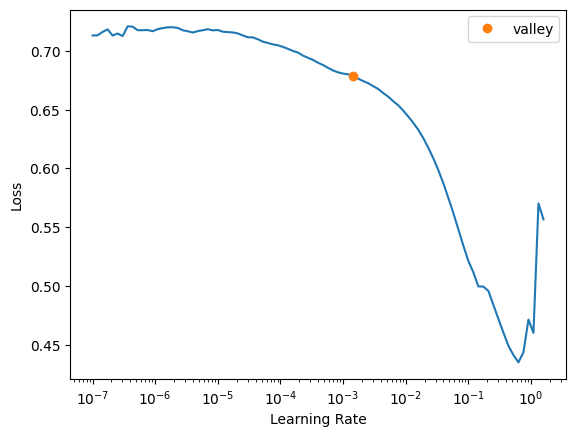

In [7]:
learn = tabular_learner(dls, metrics=accuracy)
lr = learn.lr_find()

In [8]:
learn.fit_one_cycle(5, lr)

epoch,train_loss,valid_loss,accuracy,time
0,0.150044,0.042370,0.994371,00:02
1,0.026238,0.016479,0.994580,00:02
2,0.014725,0.009494,0.997498,00:02
3,0.016980,0.007959,0.998332,00:02
4,0.012614,0.007809,0.997498,00:02


----
## Evaluating the model

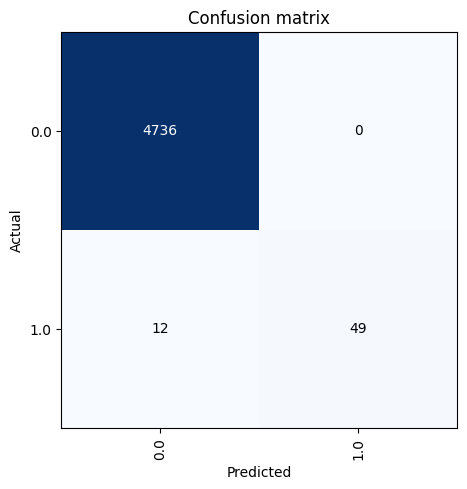

In [9]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [10]:
# Precision, Recall, F1-score
interp.print_classification_report()

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4736
         1.0       1.00      0.80      0.89        61

    accuracy                           1.00      4797
   macro avg       1.00      0.90      0.94      4797
weighted avg       1.00      1.00      1.00      4797



----
## Saving the trained model

In [12]:
model_path = "../models/model.pkl"

model_dir = os.path.dirname(model_path)
if not os.path.exists(model_dir):
    os.mkdir(model_dir)

learn.export(model_path)